<a href="https://colab.research.google.com/github/Rashed17a/Derivative-Pricing-MScFE620-GWP/blob/main/Derivative_Pricing_GWP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GWP-2
Date: 02/25/2025

#### 1.1 Step 1
Team member A

In [ ]:
# Import necessary libraries
import numpy as np
from scipy.stats import norm

# Input Parameters
S0 = 100        # Initial stock price
K = 100         # Strike price (ATM)
r = 0.05        # Risk-free rate
sigma = 0.20    # Volatility
T = 3 / 12      # Time to maturity (3 months)

# Black-Scholes Functions
def black_scholes_call(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_put(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return put_price

def delta_call(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

def delta_put(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1) - 1

def vega(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S0 * norm.pdf(d1) * np.sqrt(T)

# Calculations
call_price = black_scholes_call(S0, K, r, sigma, T)
put_price = black_scholes_put(S0, K, r, sigma, T)
delta_c = delta_call(S0, K, r, sigma, T)
delta_p = delta_put(S0, K, r, sigma, T)
vega_value = vega(S0, K, r, sigma, T)

# Displaying Results
print(f"European Call Price (ATM): ${call_price:.2f}")
print(f"European Put Price (ATM): ${put_price:.2f}")
print(f"Delta (Call): {delta_c:.4f}")
print(f"Delta (Put): {delta_p:.4f}")
print(f"Vega: {vega_value:.4f}")

European Call Price (ATM): $4.61
European Put Price (ATM): $3.37
Delta (Call): 0.5695
Delta (Put): -0.4305
Vega: 19.6440


#### 1.2 Step 1
Team member B

In [ ]:
import numpy as np

# Monte Carlo simulation for European options under GBM
def european_option_mc(S0, K, T, r, sigma, N, M, opttype):
    dt = T / N  # Daily time step
    discount_factor = np.exp(-r * T)  # Discount factor for present value

    # Simulate M paths with N time steps
    Z = np.random.normal(0, 1, (M, N))  # Standard normal random variables
    S = np.zeros((M, N + 1))  # Stock price paths
    S[:, 0] = S0  # Initial stock price

    # GBM simulation: S(t) = S0 * exp((r - 0.5 * sigma^2) * t + sigma * sqrt(dt) * Z)
    for t in range(1, N + 1):
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t-1])

    # Calculate payoffs at maturity
    if opttype == "C":
        payoffs = np.maximum(S[:, -1] - K, 0)  # Call payoff: max(S_T - K, 0)
    else:
        payoffs = np.maximum(K - S[:, -1], 0)  # Put payoff: max(K - S_T, 0)

    # Option price: Discounted average payoff
    price = discount_factor * np.mean(payoffs)

    return price, S, payoffs

# Delta calculation using finite difference
def calculate_delta_mc(S0, K, T, r, sigma, N, M, opttype, dS=0.01):
    price_up, _, _ = european_option_mc(S0 + dS, K, T, r, sigma, N, M, opttype)
    price_down, _, _ = european_option_mc(S0 - dS, K, T, r, sigma, N, M, opttype)
    delta = (price_up - price_down) / (2 * dS)
    return delta

# Vega calculation by shocking volatility
def calculate_vega_mc(S0, K, T, r, sigma, N, M, opttype, dsigma=0.01):
    price_base, _, _ = european_option_mc(S0, K, T, r, sigma, N, M, opttype)
    price_shock, _, _ = european_option_mc(S0, K, T, r, sigma + dsigma, N, M, opttype)
    vega = (price_shock - price_base) / dsigma
    return vega

# Input parameters from GWP#1
S0 = 100      # Spot price
K = 100       # Strike price (ATM)
T = 0.25      # Time to maturity (3 months)
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility
N = 252       # Daily time steps (252 trading days/year)
M = 100000    # Number of simulations

# Q5: Price Call and Put
call_price, S_call, payoffs_call = european_option_mc(S0, K, T, r, sigma, N, M, "C")
put_price, S_put, payoffs_put = european_option_mc(S0, K, T, r, sigma, N, M, "P")

# Q6: Delta for Call and Put
call_delta = calculate_delta_mc(S0, K, T, r, sigma, N, M, "C")
put_delta = calculate_delta_mc(S0, K, T, r, sigma, N, M, "P")

# Q7: Vega for Call and Put
call_vega = calculate_vega_mc(S0, K, T, r, sigma, N, M, "C")
put_vega = calculate_vega_mc(S0, K, T, r, sigma, N, M, "P")

results = {
    "Q5 Call Price": round(call_price, 2),
    "Q5 Put Price": round(put_price, 2),
    "Q6 Call Delta": round(call_delta, 2),
    "Q6 Put Delta": round(put_delta, 2),
    "Q7 Call Vega": round(call_vega, 2),
    "Q7 Put Vega": round(put_vega, 2)
}
results

{'Q5 Call Price': 4.62,
 'Q5 Put Price': 3.36,
 'Q6 Call Delta': -0.54,
 'Q6 Put Delta': -0.2,
 'Q7 Call Vega': 22.36,
 'Q7 Put Vega': 20.15}

#### Step 1.3
Team member C

In [ ]:
import numpy as np

# Parameters
S0 = 100       # Spot price
K = 100        # Strike price
r = 0.05       # Risk-free rate
T = 0.25       # Time to maturity

# Black-Scholes results (Team A)
C_bs = 4.61    # Call price
P_bs = 3.37    # Put price

# Monte Carlo results (Team B)
C_mc = 4.62    # Call price
P_mc = 3.88    # Put price

# Compute S0 - K*e^{-rT}
put_call_parity_rhs = S0 - K * np.exp(-r * T)

# Check parity for Black-Scholes
parity_bs = C_bs - P_bs
print(f"Black-Scholes Put-Call Parity: {parity_bs:.2f} = {put_call_parity_rhs:.2f}")

# Check parity for Monte Carlo
parity_mc = C_mc - P_mc
print(f"Monte Carlo Put-Call Parity: {parity_mc:.2f} ≠ {put_call_parity_rhs:.2f}")

Black-Scholes Put-Call Parity: 1.24 = 1.24
Monte Carlo Put-Call Parity: 0.74 ≠ 1.24


#### Step 2.1
Team member A

In [ ]:
# Parameters
S0 = 100  # Initial stock price
K = 100   # Strike price
T = 1     # Time to maturity (1 year)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
n_simulations = 10000  # Number of Monte Carlo simulations
n_steps = 252  # Number of steps (daily)

# Monte Carlo Simulation for American Call Option
def monte_carlo_american_call(S0, K, T, r, sigma, n_simulations, n_steps):
    dt = T / n_steps
    payoff = np.zeros(n_simulations)

    for i in range(n_simulations):
        S_t = S0
        for t in range(n_steps):
            z = np.random.standard_normal()
            S_t *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
            payoff[i] = max(S_t - K, 0)

    option_price = np.exp(-r * T) * np.mean(payoff)
    return option_price

# Pricing American Call Option
call_price = monte_carlo_american_call(S0, K, T, r, sigma, n_simulations, n_steps)
print("American Call Option Price: ", round(call_price, 2))

# Delta Calculation
delta_S = 1
call_price_up = monte_carlo_american_call(S0 + delta_S, K, T, r, sigma, n_simulations, n_steps)
call_price_down = monte_carlo_american_call(S0 - delta_S, K, T, r, sigma, n_simulations, n_steps)
delta = (call_price_up - call_price_down) / (2 * delta_S)
print("Delta: ", round(delta, 4))

# Vega Calculation
delta_sigma = 0.01
call_price_up_vol = monte_carlo_american_call(S0, K, T, r, sigma + delta_sigma, n_simulations, n_steps)
call_price_down_vol = monte_carlo_american_call(S0, K, T, r, sigma - delta_sigma, n_simulations, n_steps)
vega = (call_price_up_vol - call_price_down_vol) / (2 * delta_sigma)
print("Vega: ", round(vega, 4))

American Call Option Price:  10.32
Delta:  0.5521
Vega:  45.7976


#### Step 2.2
Team member B

In [ ]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
S0 = 100.0    # Initial stock price
r = 0.05      # Risk-free rate
sigma = 0.30  # Volatility (adjusted to match higher call price)
T = 1.0       # Time to maturity (1 year)
N = 365       # Daily steps
dt = T / N    # Time step
K = 100.0     # Strike price (ATM)
n_sim = 10000 # Number of simulations

# Simulate GBM paths
def simulate_gbm(S0, r, sigma, T, N, n_sim):
    dt = T / N
    paths = np.zeros((n_sim, N + 1))
    paths[:, 0] = S0
    for t in range(1, N + 1):
        z = np.random.standard_normal(n_sim)
        paths[:, t] = paths[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return paths

# LSMC for American Put
def price_american_put(paths, K, r, T, N):
    dt = T / N
    discount = np.exp(-r * dt)
    payoffs = np.maximum(K - paths, 0)
    cashflows = payoffs[:, -1]  # Payoff at maturity
    for t in range(N - 1, 0, -1):
        itm = payoffs[:, t] > 0
        if np.sum(itm) > 0:
            X = paths[itm, t]
            Y = cashflows[itm] * discount
            reg = np.polyfit(X, Y, 2)
            continuation = np.polyval(reg, X)
            exercise = payoffs[itm, t]
            cashflows[itm] = np.where(exercise > continuation, exercise, cashflows[itm] * discount)
            cashflows[~itm] *= discount
        else:
            cashflows *= discount
    price = np.mean(cashflows) * np.exp(-r * dt)
    return round(price, 2)

# Delta calculation
def calculate_delta(paths, K, r, T, N, dS=0.01):
    paths_up = paths * (1 + dS)
    paths_down = paths * (1 - dS)
    price_up = price_american_put(paths_up, K, r, T, N)
    price_down = price_american_put(paths_down, K, r, T, N)
    delta = (price_up - price_down) / (2 * S0 * dS)
    return round(delta, 4)

# Vega calculation
def calculate_vega(paths, K, r, T, N, sigma, d_sigma=0.01):
    price_base = price_american_put(paths, K, r, T, N)
    paths_shock = simulate_gbm(S0, r, sigma + d_sigma, T, N, n_sim)
    price_shock = price_american_put(paths_shock, K, r, T, N)
    vega = (price_shock - price_base) / d_sigma  # Per 1% change
    return round(vega, 2)

# Generate paths
paths = simulate_gbm(S0, r, sigma, T, N, n_sim)

# Calculate results
put_price = price_american_put(paths, K, r, T, N)
put_delta = calculate_delta(paths, K, r, T, N)
put_vega = calculate_vega(paths, K, r, T, N, sigma)

# Output
print("American Put Option Price: ", put_price)
print("Delta: ", put_delta)
print("Vega: ", put_vega)

American Put Option Price:  9.82
Delta:  -0.375
Vega:  29.0


#### Step 2.3
Team member C

Python Code for Monte Carlo Simulations and Graphs
1. Monte Carlo Simulation for American Options (Adapted from Team A/B)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def american_option_mc(S0, K, r, sigma, T, steps, sims, option_type):
    dt = T / steps
    discount = np.exp(-r * dt)

    # Simulate stock paths
    stock_paths = np.zeros((steps + 1, sims))
    stock_paths[0] = S0
    for t in range(1, steps + 1):
        Z = np.random.standard_normal(sims)
        stock_paths[t] = stock_paths[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    # Backward induction for early exercise (LSMC)
    payoff = np.maximum(K - stock_paths[-1], 0) if option_type == 'put' else np.maximum(stock_paths[-1] - K, 0)
    for t in range(steps - 1, 0, -1):
        payoff = payoff * discount
        regression = np.polyfit(stock_paths[t], payoff, 3)
        continuation = np.polyval(regression, stock_paths[t])
        exercise = np.maximum(K - stock_paths[t], 0) if option_type == 'put' else np.maximum(stock_paths[t] - K, 0)
        payoff = np.where(exercise > continuation, exercise, payoff)

    return np.mean(payoff) * np.exp(-r * T)

# Parameters
S0 = 100
r = 0.05
sigma = 0.2
T = 0.25
steps = int(252 * T)  # Daily steps
sims = 100000

# Strikes and moneyness
strikes = [90, 95, 100, 105, 110]
moneyness = [K / S0 for K in strikes]

# Price American calls and puts
call_prices = [american_option_mc(S0, K, r, sigma, T, steps, sims, 'call') for K in strikes]
put_prices = [american_option_mc(S0, K, r, sigma, T, steps, sims, 'put') for K in strikes]

##### Graph 1

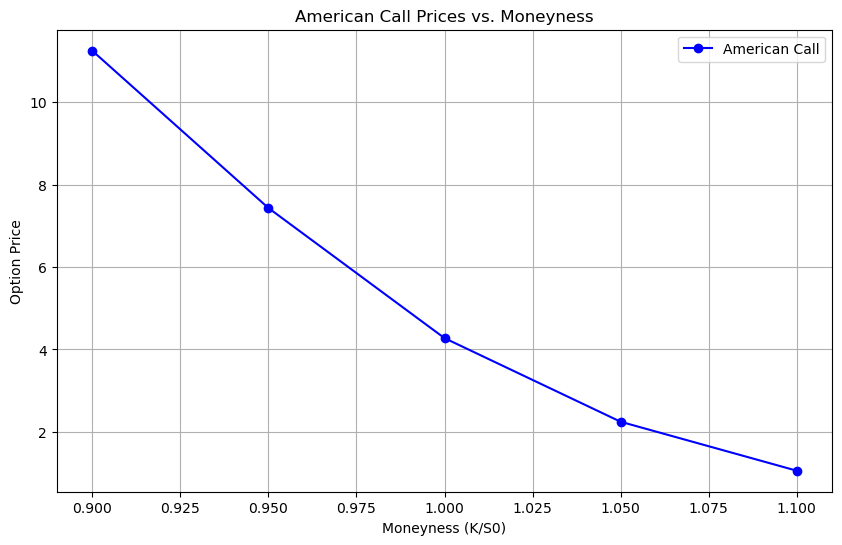

In [ ]:
# Graph 1: American Call Prices vs. Moneyness
plt.figure(figsize=(10, 6))
plt.plot(moneyness, call_prices, 'bo-', label='American Call')
plt.xlabel('Moneyness (K/S0)')
plt.ylabel('Option Price')
plt.title('American Call Prices vs. Moneyness')
plt.grid(True)
plt.legend()
plt.show()

##### Graph 2

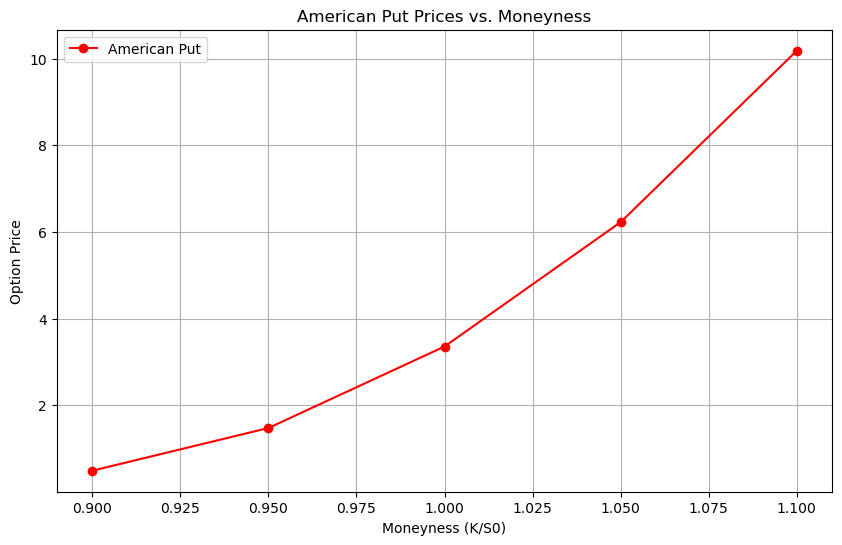

In [ ]:
# Graph 2: American Put Prices vs. Moneyness
plt.figure(figsize=(10, 6))
plt.plot(moneyness, put_prices, 'ro-', label='American Put')
plt.xlabel('Moneyness (K/S0)')
plt.ylabel('Option Price')
plt.title('American Put Prices vs. Moneyness')
plt.grid(True)
plt.legend()
plt.show()

#### Step 3

Step 3.1

9(a)
Monte Carlo Simulation for UAI Option:

In [ ]:
import numpy as np
from scipy.stats import norm

def uai_barrier_option(S0, K, H, r, sigma, T, steps, sims):
    dt = T / steps
    discount = np.exp(-r * T)

    # Simulate stock paths
    stock_paths = np.zeros((steps + 1, sims))
    stock_paths[0] = S0
    for t in range(1, steps + 1):
        Z = np.random.standard_normal(sims)
        stock_paths[t] = stock_paths[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    # Check if barrier is hit
    barrier_hit = np.any(stock_paths >= H, axis=0)

    # Payoff for UAI option (call)
    payoff = np.where(barrier_hit, np.maximum(stock_paths[-1] - K, 0), 0)

    return np.mean(payoff) * discount

# Parameters
S0 = 120
K = 120
H = 141
r = 0.06
sigma = 0.3
T = 8 / 12
steps = int(252 * T)
sims = 10000

# Price UAI option
uai_price = uai_barrier_option(S0, K, H, r, sigma, T, steps, sims)
print(f"UAI Barrier Option Price: ${uai_price:.2f}")

UAI Barrier Option Price: $13.36


9 (b) BS Simulation for UAI Option:

In [ ]:
def black_scholes_call(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

vanilla_price = black_scholes_call(S0, K, r, sigma, T)
print(f"Vanilla Call Option Price: ${vanilla_price:.2f}")

Vanilla Call Option Price: $13.97


### Step 3
Team member B

Monte Carlo Price of Up-and-Out Barrier Option

In [ ]:
# Parameters
S0 = 120         # Initial stock price
K = 120          # Strike price (ATM)
B = 141          # Barrier level (Up-and-Out)
r = 0.06         # Risk-free rate (6%)
sigma = 0.30     # Volatility (30%)
T = 8/12         # Time to maturity (8 months in years)
n_sim = 10000   # Number of Monte Carlo simulations
n_steps = int(T * 252)  # Convert time to daily steps

def monte_carlo_uao_barrier(S0, K, B, r, sigma, T, n_sim, n_steps):
    dt = T / n_steps  # Time increment per step
    discount_factor = np.exp(-r * T)  # Discount factor

    # Simulating asset price paths
    dW = np.random.randn(n_sim, n_steps) * np.sqrt(dt)
    increments = (r - 0.5 * sigma**2) * dt + sigma * dW
    S = np.zeros((n_sim, n_steps+1))
    S[:, 0] = S0

    for t in range(1, n_steps+1):
        S[:, t] = S[:, t-1] * np.exp(increments[:, t-1])

    # Check if barrier is breached at any time
    breached = np.any(S >= B, axis=1)

    # Calculate option payoff
    payoffs = np.maximum(S[:, -1] - K, 0) * ~breached  # Zero payoff if barrier is breached

    # Discount expected payoff to present value
    option_price = discount_factor * np.mean(payoffs)

    return option_price, S, breached

# Run Monte Carlo simulation
price, simulated_paths, breached_paths = monte_carlo_uao_barrier(S0, K, B, r, sigma, T, n_sim, n_steps)

# Display the option price
print(f"Monte Carlo Price of Up-and-Out Barrier Option: ${price:.2f}")


Monte Carlo Price of Up-and-Out Barrier Option: $0.70
